In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
#importing important libraries 
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv

In [51]:
dir_folder = '/content/drive/MyDrive/Face_comparison/train'
x_train = []
y_train = []
labels = []
count = 0

# tạo dữ liệu training
for i in os.listdir(dir_folder):

  path = os.path.join(dir_folder, i)
  labels.append(str(i))

  for j in os.listdir(path):

    path_img = os.path.join(path,j)
    
    img = load_img(path_img, target_size=(128,128)) 
    img = img_to_array(img)
    img = img.reshape(128,128,3) 
    img = img.astype('float32')
    img = img/255

    x_train.append(img)
    y_train.append(count)

  count += 1

In [52]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
y_train = np_utils.to_categorical(y_train)

print(x_train.shape, y_train.shape)

(363, 128, 128, 3) (363, 12)


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=70)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(290, 128, 128, 3) (290, 12)
(73, 128, 128, 3) (73, 12)


In [54]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(2,2),
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same',
                 input_shape=(128,128,3),
                 strides=(1,1)))

model.add(Conv2D(filters=64,
                 kernel_size=(2,2),
                 activation='relu',
                 padding='same',
                 strides=(1,1)))

model.add(Conv2D(filters=128,
                 kernel_size=(2,2),
                 padding='same',
                 activation='relu',
                 strides=(2,2)))

model.add(Conv2D(filters=256,
                 kernel_size=(2,2),
                 padding='same',
                 activation='relu',
                 strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(512, activation='relu',input_shape=(128*128*3,), name='layer1')) 
model.add(Dropout(0.2))
model.add(Dense(1028, activation='relu', name='layer2'))
model.add(Dropout(0.2))
model.add(Dense(2056, activation='relu', name='layer3'))
model.add(Dropout(0.2))
model.add(Dense(2056, activation='relu', name='layer5'))
model.add(Dropout(0.2))
model.add(Dense(1028, activation='relu', name='layer6'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='softmax', name='layer7'))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.000001),metrics = ['accuracy'])               
history = model.fit(x_train, y_train, epochs=2000, verbose=1)
model.save('/content/drive/MyDrive/Face_comparison/Face_comparison.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 64)      8256      
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 128)       32896     
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 256)       131328    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 256)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 262144)            0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


10/10 [==============================] - 2s 136ms/step - loss: 2.4856 - accuracy: 0.0897
Epoch 2/2000
10/10 [==============================] - 1s 103ms/step - loss: 2.4793 - accuracy: 0.1034
Epoch 3/2000
10/10 [==============================] - 1s 104ms/step - loss: 2.4843 - accuracy: 0.0828
Epoch 4/2000
10/10 [==============================] - 1s 109ms/step - loss: 2.4882 - accuracy: 0.0586
Epoch 5/2000
10/10 [==============================] - 1s 103ms/step - loss: 2.4787 - accuracy: 0.0931
Epoch 6/2000
10/10 [==============================] - 1s 103ms/step - loss: 2.4786 - accuracy: 0.1172
Epoch 7/2000
10/10 [==============================] - 1s 102ms/step - loss: 2.4800 - accuracy: 0.1138
Epoch 8/2000
10/10 [==============================] - 1s 103ms/step - loss: 2.4759 - accuracy: 0.1069
Epoch 9/2000
10/10 [==============================] - 1s 103ms/step - loss: 2.4783 - accuracy: 0.1069
Epoch 10/2000
10/10 [==============================] - 1s 103ms/step - loss: 2.4713 - accuracy:

In [55]:
model = load_model('/content/drive/MyDrive/Face_comparison/Face_comparison.h5') 

In [56]:
print(labels)

['Xuan_Nghi', 'Hoai_Linh', 'Truong_Giang', 'Doan_Quoc_Dam', 'Quyen_Linh', 'Tien_Luat', 'Tran_Thanh', 'Viet_Anh', 'Duy_Hung', 'Anh_Tu', 'Kieu_Anh_Tuan', 'Thanh_Son']


In [57]:
classes = ['Xuan_Nghi', 'Hoai_Linh', 'Truong_Giang', 'Doan_Quoc_Dam', 'Quyen_Linh', 'Tien_Luat', 'Tran_Thanh', 'Viet_Anh', 'Duy_Hung', 'Anh_Tu', 'Kieu_Anh_Tuan', 'Thanh_Son']

[[1.1333944e-08 2.1311695e-09 1.7819091e-09 4.2001593e-09 7.1697251e-08
  1.3366817e-10 9.9999976e-01 2.1642164e-11 1.0933723e-09 1.8336428e-10
  1.1277736e-10 6.1431265e-08]]
Khuôn mặt giống: Tran_Thanh
Tỉ lệ chính xác: 99.99997615814209 %


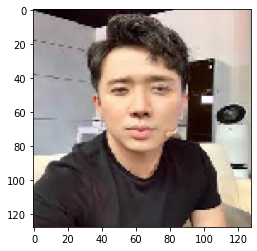

In [58]:
import matplotlib.pyplot as plt
import numpy as np
img = load_img('1.jpg', target_size=(128,128))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,128,128,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
percentage = y_pred.max()
percentage = percentage * 100

print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
print("Khuôn mặt giống:",classes[y_classes[0]]) 
print("Tỉ lệ chính xác:",percentage, "%")

[[1.7292370e-01 5.7085468e-05 2.2582306e-06 1.8647742e-04 3.2870194e-06
  1.6001521e-05 8.2646108e-01 9.7649013e-07 4.8085344e-06 5.8181518e-05
  6.2915551e-06 2.7986211e-04]]
Khuôn mặt giống: Tran_Thanh
Tỉ lệ chính xác: 82.64610767364502 %


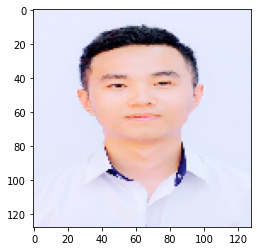

In [61]:
import matplotlib.pyplot as plt
import numpy as np
img = load_img('HINHTHE.jpg', target_size=(128,128))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,128,128,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
percentage = y_pred.max()
percentage = percentage * 100

print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
print("Khuôn mặt giống:",classes[y_classes[0]]) 
print("Tỉ lệ chính xác:",percentage, "%")

[[2.5983319e-08 9.7304145e-08 1.4164326e-09 3.3435002e-10 9.4793506e-09
  7.1952516e-10 9.9999964e-01 1.5664327e-11 1.0477286e-08 2.0725263e-07
  2.5143518e-09 1.0619265e-08]]
Khuôn mặt giống: Tran_Thanh
Tỉ lệ chính xác: 99.99996423721313 %


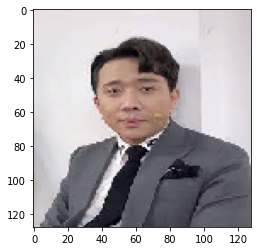

In [62]:
import matplotlib.pyplot as plt
import numpy as np
img = load_img('12.jpg', target_size=(128,128))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,128,128,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
percentage = y_pred.max()
percentage = percentage * 100

print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
print("Khuôn mặt giống:",classes[y_classes[0]]) 
print("Tỉ lệ chính xác:",percentage, "%")

[[1.58485189e-08 9.09713371e-09 4.24133795e-09 7.47642126e-09
  2.65059863e-10 1.57112656e-09 1.09753735e-08 7.34737715e-10
  1.14476606e-08 7.38383410e-10 8.03941566e-11 1.00000000e+00]]
Khuôn mặt giống: Thanh_Son
Tỉ lệ chính xác: 100.0 %


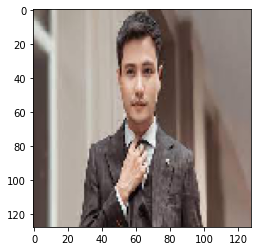

In [63]:
import matplotlib.pyplot as plt
import numpy as np
img = load_img('5.jpg', target_size=(128,128))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,128,128,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
percentage = y_pred.max()
percentage = percentage * 100

print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
print("Khuôn mặt giống:",classes[y_classes[0]]) 
print("Tỉ lệ chính xác:",percentage, "%")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
img = load_img('5.jpg', target_size=(128,128))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,128,128,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
percentage = y_pred.max()
percentage = percentage * 100

print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
print("Khuôn mặt giống:",classes[y_classes[0]]) 
print("Tỉ lệ chính xác:",percentage, "%")

In [64]:
from google.colab import drive
drive.mount('/content/drive') 
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Face_comparison.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-06-21 17:42:03--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-06-21 17:42:04 (38.3 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Face_comparison.ipynb to pdf
[NbConvertApp] Support files will be in Face_comparison_files/
[NbConvertApp] Making directory ./Face_comparison_files
[NbConvertApp] Making directo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'